Dataset - https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

Ref - https://github.com/zhongyy/Face-Transformer

## Loading Dataset

In [11]:
import pandas as pd
attr_df = pd.read_csv('./Dataset/CelebA/Anno/list_attr_celeba.txt', delim_whitespace=True, header=1, index_col=0)
attr_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [12]:
attr_df.shape

(202599, 40)

```json
{
   "facial_feats":[
      "Arched_Eyebrows",
      "Bags_Under_Eyes",
      "Big_Lips",
      "Big_Nose",
      "Bushy_Eyebrows",
      "Double_Chin",
      "High_Cheekbones",
      "Mouth_Slightly_Open",
      "Pointy_Nose",
      "Narrow_Eyes",
      "Oval_Face",
      "Rosy_Cheeks"
   ],
   "facial_hair":[
      "5_o_Clock_Shadow",
      "Goatee",
      "Mustache",
      "No_Beard",
      "Sideburns"
   ],
   "hair_style":[
      "Bald",
      "Bangs",
      "Black_Hair",
      "Blond_Hair",
      "Brown_Hair",
      "Gray_Hair",
      "Receding_Hairline",
      "Straight_Hair",
      "Wavy_Hair"
   ],
   "aesthetics":[
      "Attractive",
      "Smiling",
      "Pale_Skin",
      "Male",
      "Young",
      "Chubby",
      "Wearing_Hat",
      "Wearing_Necktie",
      "Wearing_Necklace",
      "Wearing_Lipstick",
      "Eyeglasses",
      "Heavy_Makeup"
   ]
}
```



In [13]:
columns_list = ['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']
columns_dict = {k:v for k, v in enumerate(columns_list)}

In [14]:
import random
def getattr_text(row):
    result = []
    cols = row[columns_list].to_list()

    for i, col in enumerate(cols):
      if col == 1:
         result.append(columns_dict[i])

    try:
        position = result.index('No_Beard')
        del result[position]
    except:
        pass

    return ", ".join(r for r in result)

In [28]:
from tqdm import tqdm

tqdm.pandas()
attr_df["attr_str"] = attr_df.progress_apply(getattr_text, axis=1)

100%|██████████| 202599/202599 [00:28<00:00, 7119.45it/s]


## Dataset Prview

In [29]:
attr_df.head()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,attr_str,attr_str_exp
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,1,-1,-1,1,"Arched_Eyebrows, Attractive, Brown_Hair, Heavy...","Female, Arched_Eyebrows, Attractive, Brown_Hai..."
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,1,"Bags_Under_Eyes, Big_Nose, Brown_Hair, High_Ch...","Female, Bags_Under_Eyes, Big_Nose, Brown_Hair,..."
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,1,"Big_Lips, Blurry, Male, Narrow_Eyes, Pointy_No...","Male, Big_Lips, Blurry, Narrow_Eyes, Pointy_No..."
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,1,1,-1,1,"Attractive, Pointy_Nose, Straight_Hair, Wearin...","Female, Attractive, Pointy_Nose, Straight_Hair..."
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,1,"Arched_Eyebrows, Attractive, Big_Lips, Heavy_M...","Female, Arched_Eyebrows, Attractive, Big_Lips,..."


In [30]:
attr_df.index.name = 'image_id'
attr_df.reset_index(inplace=True)

In [21]:
# sample_df = attr_df.sample(6)
# image_ids =  sample_df.iloc[:, 0].to_list()

In [23]:
# sample_df.index.name = 'image_id'
# sample_df.reset_index(inplace=True)

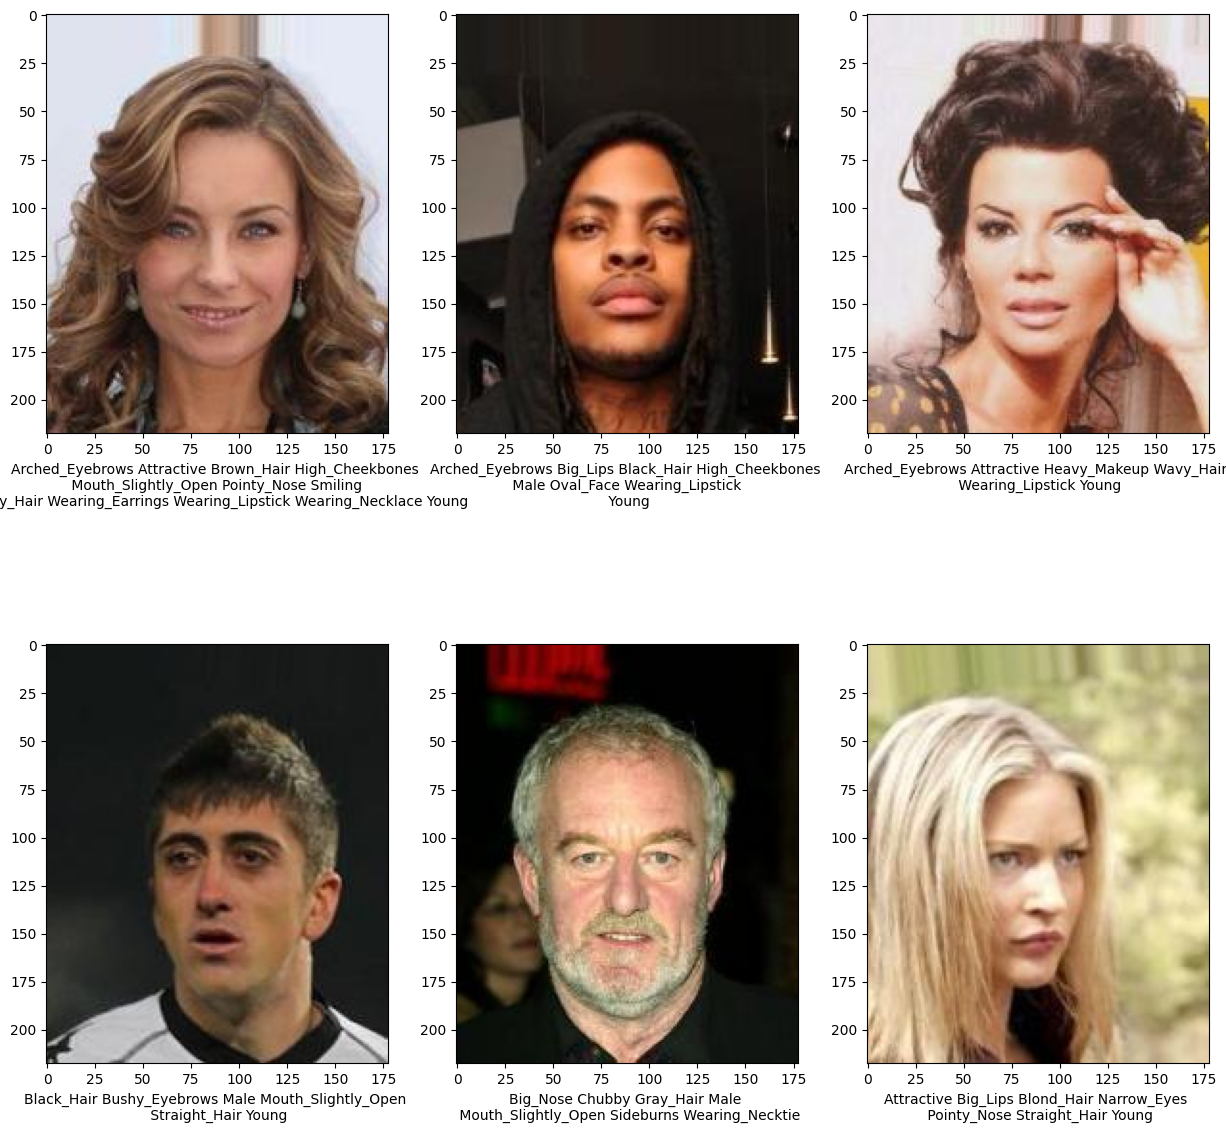

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os

sample_df = attr_df.sample(6)
img_folder = "./Dataset/CelebA/Img/img_align_celeba/img_align_celeba"
image_ids =  sample_df["image_id"].to_list()
image_names = [os.path.join(img_folder, image_id) for image_id in image_ids]
image_attrs=  sample_df[sample_df["image_id"].isin(image_ids)]["attr_str"]
formatted_image_attrs = []
for image_attr in image_attrs:
    attrs = image_attr.split(", ")
    x = 4
    i = 0
    while i < len(attrs):
        attrs.insert(x, "\n")
        x += 4
        i += x
    formatted_image_attrs.append(' '.join(attr for attr in attrs))

_, axes = plt.subplots(2, 3, figsize=(15, 15))
for image_name, image_attr, ax in zip(image_names, formatted_image_attrs, axes.flatten()):

    image = cv2.imread(image_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.set_xlabel(str(image_attr))
    ax.imshow(image)

plt.show()

In [32]:
attr_df["attr_str_exp"] = attr_df["attr_str"].apply(lambda x : "Male@ " + x if "Male" in x else "Female, " + x)
attr_df["attr_str_exp"] = attr_df["attr_str_exp"].apply(lambda x : x.replace(" Male,", "") if " Male," in x else x)
attr_df["attr_str_exp"] = attr_df["attr_str_exp"].apply(lambda x : x.replace("Male,", "") if "Male," in x else x)
attr_df["attr_str_exp"] = attr_df["attr_str_exp"].apply(lambda x : x.replace(" Male", "") if " Male" in x else x)
attr_df["attr_str_exp"] = attr_df["attr_str_exp"].apply(lambda x : x.replace("Male@", "Male,") if "Male@" in x else x)

In [33]:
print(attr_df.shape)
attr_exceptions = attr_df[attr_df.attr_str_exp.str.contains("Female, 5_o_Clock_Shadow")]["image_id"].to_list()
attr_df = attr_df[~attr_df["image_id"].isin(attr_exceptions)]
print(attr_df.shape)

(202599, 43)
(202579, 43)


In [37]:
data_parts = pd.read_csv('./Dataset/CelebA/Eval/list_eval_partition.txt', delim_whitespace=True, header=None)

In [39]:
data_parts.columns = ["image_id", "partition"]

In [40]:
# data_parts = pd.read_csv("./CelebA/Eval/list_eval_partition.csv")
# read from partion.txt file
# data_parts = pd.read_csv('./Dataset/CelebA/Eval/list_eval_partition.txt', delim_whitespace=True, header=None)
train_ids = data_parts[data_parts.partition == 0]["image_id"].to_list()
eval_ids = data_parts[data_parts.partition == 1]["image_id"].to_list()
test_ids = data_parts[data_parts.partition == 2]["image_id"].to_list()
train_df = attr_df[attr_df.image_id.isin(train_ids)]
eval_df = attr_df[attr_df.image_id.isin(eval_ids)]
test_df = attr_df[attr_df.image_id.isin(test_ids)]

In [41]:
train_male_samples = train_df[train_df["attr_str"].str.contains("Male")]
train_female_samples = train_df[~train_df["attr_str"].str.contains("Male")]

eval_male_samples = eval_df[eval_df["attr_str"].str.contains("Male")]
eval_female_samples = eval_df[~eval_df["attr_str"].str.contains("Male")]

In [42]:
hard_negatives = {
'5_o_Clock_Shadow': "No_",
'Arched_Eyebrows': "No_",
'Attractive': "Not_",
'Bags_Under_Eyes': "No_",
'Bald': "Not_",
'Bangs': "No_",
'Big_Lips': "Not_",
'Big_Nose': "Not_",
'Black_Hair': "Not_",
'Blond_Hair': "Not_",
'Blurry': "Not_",
'Brown_Hair': "Not_",
'Bushy_Eyebrows': "Not_",
'Chubby': "Not_",
'Double_Chin': "No_",
'Eyeglasses':"No_",
'Goatee': "No_",
'Gray_Hair': "Not_",
'Heavy_Makeup': "No_",
'High_Cheekbones': "No_",
'Male': "Female",
'Mouth_Slightly_Open': "Mouth_Not_Slightly_Open",
'Mustache': "No_",
'Narrow_Eyes': "No_",
'Oval_Face': "Not_",
'Pale_Skin': "Not_",
'Pointy_Nose': "Not_",
'Receding_Hairline': "No_",
'Rosy_Cheeks' : "No_",
'Sideburns': "No_",
'Smiling': "Not_",
'Straight_Hair': "No_",
'Wavy_Hair':"No_",
'Wearing_Earrings':"Not_",
'Wearing_Hat':"Not_",
'Wearing_Lipstick':"Not_",
'Wearing_Necklace':"Not_",
'Wearing_Necktie':"Not_",
'Young':"Not_",
}

In [44]:
def gen_triplets(df, male_samples, female_samples):

    import random
    triples= []

    for i, row in tqdm(df.iterrows(), total=df.shape[0]):

        if row["attr_str"] == "":
           continue

        flipped = set()

        """
        Easy triples - Random
        """
        if "Male" in row["attr_str"]:
            negatives = female_samples.sample(1)
        else:
            negatives = male_samples.sample(1)

        for j, negative in negatives.iterrows():
            # Add anchor A and Positive P
            triple = {}
            triple = {"image_id": row["image_id"], "pos": row["attr_str_exp"]}
            # Add Negative N
            triple["neg"] = negative["attr_str_exp"]
            triple["mode"] = "easy"
            triples.append(triple)
        """
        Semi-hard triples by getting a random same gender record but unmatching attributes, N times
        """
        count = 0
        max_semi_hard = 2
        while count < max_semi_hard:
            semi_hard_found = False
            while not semi_hard_found:
                if "Male" in row["attr_str"]:
                    negatives = male_samples.sample(1)
                else:
                    negatives = female_samples.sample(1)

                for j, negative in negatives.iterrows():
                      # Add anchor A and Positive P
                      triple = {}
                      triple = {"image_id": row["image_id"], "pos": row["attr_str_exp"]}
                      # Add Negative N
                      if row[columns_list].to_list() != negative[columns_list].to_list():
                          triple["neg"] = negative["attr_str_exp"]
                          triples.append(triple)
                          triple["mode"] = "semi"
                          semi_hard_found = True
                          count += 1
        """
        Hard triples by flipping 1 to 2 attributes of the positive attributes
        """

        max_flips = random.randint(1,2)
        count = 0
        flipped = set()
        visited_attribs = set()
        exit = False
        triple = {}
        triple = {"image_id": row["image_id"], "pos": row["attr_str_exp"]}

        while count < max_flips:

              attribs = row["attr_str"].split(", ")
              # print("attribs", attribs)

              while True:

                  random_attrib = random.choice(attribs)

                  if random_attrib not in visited_attribs:
                      visited_attribs.add(random_attrib)
                      if random_attrib == "Male" and ("5_o_Clock_Shadow" in attribs or "Goatee"   in attribs \
                          or "Mustache" in attribs or "Sideburns" in attribs):
                          continue
                      else:
                        break
                  else:
                    if set(attribs) == visited_attribs:
                      exit = True
                      break

              if exit:
                  break

              if random_attrib not in flipped:

                  # print("Working with", random_attrib)
                  if random_attrib in hard_negatives:

                    flipped.add(random_attrib)
                    count += 1
                    neg_attrib = hard_negatives[random_attrib]

                    if neg_attrib.endswith("_"):
                        flipped_attrib = neg_attrib + random_attrib
                    else:
                        flipped_attrib = neg_attrib

                    # print("Flipped is ", flipped_attrib)
                    if "neg" not in triple:
                        hard_neg_str = row["attr_str_exp"].replace(random_attrib, flipped_attrib)
                    else:
                        hard_neg_str = triple["neg"].replace(random_attrib, flipped_attrib)
                    # print("Neg is ", hard_neg_str)
                    triple["mode"] = "hard"
                    triple["neg"] = hard_neg_str
              else:
                  if set(attribs) == flipped:
                    break

        # Add Hard Negative N
        triples.append(triple)

    return triples

In [45]:
train_triplet_df = pd.DataFrame(gen_triplets(train_df, train_male_samples, train_female_samples))
eval_triplet_df = pd.DataFrame(gen_triplets(eval_df, eval_male_samples, eval_female_samples))

100%|██████████| 19865/19865 [00:26<00:00, 746.06it/s]


In [46]:
train_exceptions = train_triplet_df[train_triplet_df["neg"].isna()]["image_id"].to_list()
eval_exceptions = eval_triplet_df[eval_triplet_df["neg"].isna()]["image_id"].to_list()
train_triplet_df = train_triplet_df[~train_triplet_df["image_id"].isin(train_exceptions)]
eval_triplet_df = eval_triplet_df[~eval_triplet_df["image_id"].isin(eval_exceptions)]

In [47]:
train_triplet_df["pos"] = train_triplet_df["pos"].apply(lambda x: x.replace("5_o_Clock_Shadow", "5o_Clock_Shadow"))
train_triplet_df["pos"] = train_triplet_df["pos"].apply(lambda x: x.replace("_", " "))
train_triplet_df["neg"] = train_triplet_df["neg"].apply(lambda x: x.replace("5_o_Clock_Shadow", "5o_Clock_Shadow"))
train_triplet_df["neg"] = train_triplet_df["neg"].apply(lambda x: x.replace("_", " "))

eval_triplet_df["pos"] = eval_triplet_df["pos"].apply(lambda x: x.replace("5_o_Clock_Shadow", "5o_Clock_Shadow"))
eval_triplet_df["pos"] = eval_triplet_df["pos"].apply(lambda x: x.replace("_", " "))
eval_triplet_df["neg"] = eval_triplet_df["neg"].apply(lambda x: x.replace("5_o_Clock_Shadow", "5o_Clock_Shadow"))
eval_triplet_df["neg"] = eval_triplet_df["neg"].apply(lambda x: x.replace("_", " "))

In [48]:
train_triplet_df.reset_index(drop=True, inplace=True)
eval_triplet_df.reset_index(drop=True, inplace=True)

In [49]:
print(train_triplet_df.shape)
print(eval_triplet_df.shape)

(650964, 4)
(79444, 4)


In [50]:
train_triplet_df["mode"].value_counts()

mode
semi    325482
easy    162741
hard    162741
Name: count, dtype: int64

In [51]:
pd.set_option('max_colwidth', None)
train_triplet_df.head(4)

,image_id,pos,neg,mode
0,000001.jpg,"Female, Arched Eyebrows, Attractive, Brown Hair, Heavy Makeup, High Cheekbones, Mouth Slightly Open, Pointy Nose, Smiling, Straight Hair, Wearing Earrings, Wearing Lipstick, Young","Male, Big Nose, High Cheekbones, Mouth Slightly Open, Smiling, Wavy Hair, Young",easy
1,000001.jpg,"Female, Arched Eyebrows, Attractive, Brown Hair, Heavy Makeup, High Cheekbones, Mouth Slightly Open, Pointy Nose, Smiling, Straight Hair, Wearing Earrings, Wearing Lipstick, Young","Female, Arched Eyebrows, Attractive, Blond Hair, Heavy Makeup, Pointy Nose, Wavy Hair, Wearing Lipstick, Wearing Necklace, Young",semi
2,000001.jpg,"Female, Arched Eyebrows, Attractive, Brown Hair, Heavy Makeup, High Cheekbones, Mouth Slightly Open, Pointy Nose, Smiling, Straight Hair, Wearing Earrings, Wearing Lipstick, Young","Female, Attractive, Brown Hair, Heavy Makeup, Oval Face, Pointy Nose, Smiling, Wearing Lipstick, Young",semi
3,000001.jpg,"Female, Arched Eyebrows, Attractive, Brown Hair, Heavy Makeup, High Cheekbones, Mouth Slightly Open, Pointy Nose, Smiling, Straight Hair, Wearing Earrings, Wearing Lipstick, Young","Female, Arched Eyebrows, Attractive, Brown Hair, Heavy Makeup, High Cheekbones, Mouth Slightly Open, Pointy Nose, Smiling, Straight Hair, Wearing Earrings, Not Wearing Lipstick, Young",hard


## Preparing Dataset

In [55]:
from utils.visualhuntdataset import FaceFetchDataset

train_dataset = FaceFetchDataset(
                           root_dir='./Dataset/CelebA/Img/img_align_celeba/img_align_celeba',
                           df=train_triplet_df,
                           nn_arch = "TRN"
                            )

dev_dataset = FaceFetchDataset(
                           root_dir='./Dataset/CelebA/Img/img_align_celeba/img_align_celeba',
                           df=eval_triplet_df,
                           nn_arch = "TRN"
                            )

from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 64
eval_batch_size = 64
dataloader_train = DataLoader(train_dataset,
                              sampler=SequentialSampler(train_dataset),
                              batch_size=batch_size)
dataloader_validation = DataLoader(dev_dataset,
                                   sampler=SequentialSampler(dev_dataset),
                                   batch_size=eval_batch_size)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

C:\Users\ishan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ishan\.cache\huggingface\hub\models--google--vit-base-patch16-224-in21k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

C:\Users\ishan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [56]:
next(iter(dataloader_train))["anchor"]["pixel_values"].shape # when using HF models
#next(iter(dataloader_train))["anchor"].shape # when using CNNs or custom models

torch.Size([64, 3, 224, 224])

## FaceFetchNetwork Model

In [57]:
# import math
from torch import nn
import torch.nn.functional as F

class FaceFetchNetwork(nn.Module):

    def __init__(self, hyperparms=None):

        super(FaceFetchNetwork, self).__init__()
        self.vision_projection = nn.Linear(hyperparms["vision_dim"], hyperparms["proj_dim"])
        self.text_projection = nn.Linear(hyperparms["text_dim"], hyperparms["proj_dim"])
        self.dropout = nn.Dropout(0.1)

        device = hyperparms["device"]
        nn_arch = hyperparms["nn_arch"]
        if  nn_arch == "TRN":
            model_name = hyperparms["model_name"]
            self.image_encoder = ImageEncoder(model_name, nn_arch, device=device)
        else:
            self.image_encoder = ImageEncoder(device=device)

        self.text_encoder = TextEncoder(device=device)
        EUCLIDEAN = lambda x, y: F.pairwise_distance(x, y, p=2)
        #COSINE = lambda x, y: 1 - F.cosine_similarity(x, y)
        self.criterion = nn.TripletMarginWithDistanceLoss(margin=0.1, distance_function=EUCLIDEAN, reduction="mean")
        self.relu_f = nn.ReLU()

    def forward(self, batch):

        # Getting Image and Text Features
        image_emb = self.image_encoder(batch["anchor"])
        image_emb = torch.nn.functional.normalize(image_emb, p=2, dim=1)

        # Getting Image and Text Embeddings (with same dimension)
        image_emb = self.relu_f(self.vision_projection(image_emb))
        image_emb = self.dropout(image_emb)

        pos_attr_emb = self.text_encoder(batch["pos_attr"])
        pos_attr_emb = torch.nn.functional.normalize(pos_attr_emb, p=2, dim=1)
        pos_attr_emb = self.relu_f(self.text_projection(pos_attr_emb))
        pos_attr_emb = self.dropout(pos_attr_emb)

        neg_attr_emb = self.text_encoder(batch["neg_attr"])
        neg_attr_emb = torch.nn.functional.normalize(neg_attr_emb, p=2, dim=1)
        neg_attr_emb = self.relu_f(self.text_projection(neg_attr_emb))
        neg_attr_emb = self.dropout(neg_attr_emb)

        # Calculating the Loss (Note: Triplet Loss calculation)
        loss = self.criterion(image_emb, pos_attr_emb, neg_attr_emb)      
        return loss



## Training the Model

In [64]:
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [65]:
device

'cuda:0'

In [58]:
from model.visualhunt import VisualHuntNetwork

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# To use Transformer for Vision
model = VisualHuntNetwork(hyperparms={"device": device, "nn_arch": "TRN", "model_name": "google/vit-base-patch16-224-in21k", "vision_dim": 768, "text_dim": 768, "proj_dim": 512})
model.to(device)
print()

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

C:\Users\ishan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ishan\.cache\huggingface\hub\models--sentence-transformers--all-mpnet-base-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [59]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW


optimizer = AdamW(model.parameters(),
                  lr=5e-5,
                  weight_decay = 1e-5,
                  eps=1e-8
                  )


epochs = 20
train_steps= int((train_triplet_df.shape[0] / batch_size) * epochs)
print("train_steps", train_steps)
warm_steps = train_steps * 0.1
print("warm_steps", warm_steps)
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=warm_steps,
                                            num_training_steps=train_steps)

"""
Other popular lr scheduler suggested in contrastive pretraining literatures is ReduceLROnPlateau, checkout pytorch official documentation for full details.
"""

# params = [
#         {"params": model.image_encoder.parameters(), "lr": 1e-4},
#         {"params": model.text_encoder.parameters(), "lr": 1e-5}
# ]
# optimizer = torch.optim.AdamW(params, weight_decay=0.)
# lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer, mode="min", patience=1, factor=0.7
# )

train_steps 203426
warm_steps 20342.600000000002


'\nOther popular lr scheduler suggested in contrastive pretraining literatures is ReduceLROnPlateau, checkout pytorch official documentation for full details.\n'

In [60]:
import random
from torch import nn
from tqdm.notebook import tqdm
import numpy as np
import requests


def evaluate(dataloader_val):

    model.eval()
    loss_val_total = 0

    for batch in dataloader_val:
        with torch.no_grad():
            loss = model(batch)

        loss_val_total += loss.item()
    loss_val_avg = loss_val_total/len(dataloader_val)

    return loss_val_avg

def train():

  train_history = open("./models/train_history.csv", "w")
  log_hdr  = "Epoch, train_loss, val_loss"
  train_history.write(log_hdr  + "\n")
  train_losses = []
  val_losses = []
  min_val_loss = -1
  epochs_no_improve = 0
  early_stopping_epoch = 1
  early_stop = False
  best_loss = float('inf')


  for epoch in tqdm(range(1, epochs+1)):

      model.train()
      loss_train_total = 0

      progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

      for batch in progress_bar:
          model.zero_grad()

          loss = model(batch)
          loss_train_total += loss.item()
          loss.backward()
          optimizer.step()
          scheduler.step()

          progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})

      tqdm.write(f'\nEpoch {epoch}')
      loss_train_avg = loss_train_total/len(dataloader_train)
      tqdm.write(f'Training loss: {loss_train_avg}')
      val_loss = evaluate(dataloader_validation)
      tqdm.write(f'Validation loss: {val_loss}')
      #scheduler.step(val_loss)  # Uncomment if you use ReduceLROnPlateau

      if val_loss < best_loss:
          best_loss = val_loss
          tqdm.write('\nSaving best model')
          torch.save(model.state_dict(), f'models/facefetch_epoch_{epoch}.model')

      train_losses.append(loss_train_avg)
      val_losses.append(val_loss)
      log_str  = "{}, {}, {}".format(epoch, loss_train_avg, val_loss)
      train_history.write(log_str + "\n")

      if min_val_loss < 0:
          min_val_loss = val_loss
      else:
        if val_loss < min_val_loss:
            min_val_loss = val_loss
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= early_stopping_epoch:
                early_stop = True
                break
            else:
                continue


  if early_stop:
    print("Early Stopping activated at epoch -", epoch )
    print("Use the checkpoint at epoch - ", epoch - early_stopping_epoch)

  train_history.close()
  return train_losses, val_losses

In [ ]:
import glob
import os
from matplotlib import pyplot as plt
torch.cuda.empty_cache()
!rm -rf ./models
!mkdir ./models
do_plot = False


try:
    train_losses, val_losses =  train()
    if do_plot:
        plt.plot(train_losses)
        plt.plot(val_losses)
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

    torch.cuda.empty_cache()
    list_of_files = glob.glob('./models/*.model')
    latest_file = max(list_of_files, key=os.path.getctime)
    os.system('cp ' + latest_file  + ' ./models/best_facefetch.model')

except:
    torch.cuda.empty_cache()
    list_of_files = glob.glob('./models/*.model')
    latest_file = max(list_of_files, key=os.path.getctime)
    os.system('cp ' + latest_file  + ' ./models/best_facefetch.model')